In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(f'../03.dataset/NTPC_model_features_clean.csv')

In [3]:
data_class = pd.get_dummies(data['鄉鎮市區'])
#data = data.loc[data['交易標的'] == 0]
data_class.columns = ['鄉鎮市區_' + str(x) for x in data_class.columns]
data = pd.concat([data, data_class], axis = 1)
print(data.shape[1])

131


In [4]:
data.insert(data.shape[1], 'y', data['單價元平方公尺'])
data.drop(['單價元平方公尺'],axis=1,inplace=True)
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.drop(['Unnamed: 0.1'],axis=1,inplace=True)
data.drop(['Unnamed: 0.2'],axis=1,inplace=True)
data.drop(['鄉鎮市區'],axis=1,inplace=True)
#data = data.loc[data['備註'].isnull()]
#data.drop(['備註'],axis=1,inplace=True)
data.drop(['geometry'],axis=1,inplace=True)

In [5]:
data = data.loc[:, data.std() > 0]
data = data.dropna()

In [6]:
data.head()

,交易標的,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,有無管理組織,主建物面積,附屬建物面積,陽台面積,電梯,屋齡,...,鄉鎮市區_瑞芳區,鄉鎮市區_石碇區,鄉鎮市區_石門區,鄉鎮市區_萬里區,鄉鎮市區_蘆洲區,鄉鎮市區_貢寮區,鄉鎮市區_金山區,鄉鎮市區_雙溪區,鄉鎮市區_鶯歌區,y
0,0,2,1,1,0,0.00,0.00,0.00,1,3.0,...,0,0,0,0,0,0,0,0,0,44517.0
1,0,3,1,2,0,70.47,0.00,9.72,0,15.0,...,0,0,0,0,1,0,0,0,0,96624.0
2,0,2,2,1,1,53.43,1.42,5.36,1,17.0,...,0,0,0,0,0,0,0,0,0,48820.0
3,0,1,1,1,1,29.31,0.00,3.92,1,16.0,...,0,0,0,0,0,0,0,0,0,42345.0
4,0,3,2,2,1,71.74,0.00,8.90,1,10.0,...,0,0,0,0,0,0,0,0,0,99863.0


In [7]:
test_data = data.loc[data['交易年份'] >= 111]
train_data =  data.loc[data['交易年份'] < 111]
#train_data = train_data.loc[data['交易年份'] > 107]

In [8]:
feature_count = data.shape[1]
print(feature_count)

126


In [9]:
#from sklearn.preprocessing import StandardScaler

In [10]:
#scaler = StandardScaler()
#scaler.fit(train_data)

In [11]:
#data_norm = scaler.transform(train_data)
#pd.DataFrame(data_norm).describe()

In [12]:
#X = data_norm[:,0:115]
#y = data_norm[:,115]
#X = data_norm[:,0:feature_count-1]
#y = data_norm[:,feature_count-1]

In [13]:
mean = train_data.mean()
std = train_data.std()
train_data = (train_data-mean)/std

In [14]:
X_train = np.array(train_data.drop('y', axis='columns'))
y_train = np.array(train_data['y'])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4)

In [17]:
from sklearn.neural_network import MLPRegressor

In [18]:
model_mlp = MLPRegressor(random_state=14,max_iter = 400,activation='relu', hidden_layer_sizes=(int(data.shape[1]*1/2),int(data.shape[1]*1/4)))
model_mlp.fit(X_train, y_train)
mlp_score=model_mlp.score(X_train,y_train)

In [19]:
test_data = (test_data - mean) / std
#test_data = test_data.loc[test_data['y'] >= 3]
X_test = np.array(test_data.drop('y', axis='columns'))
y_test = np.array(test_data['y'])

In [20]:
print('score:',mlp_score)
result = model_mlp.predict(X_test)

score: 0.9157064964301522


In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': result})
df1 = df.head(10)
df1

,Actual,Predicted
0,0.603101,0.689353
1,2.337506,2.734014
2,-0.000451,0.558271
3,-1.799081,-1.920494
4,-1.353926,-1.112805
5,2.903241,1.379405
6,-0.517908,-0.145776
7,0.552110,0.880702
8,0.015082,0.135052
9,-0.215026,-0.155148


C:\Users\tazz4\anaconda3\envs\ox\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

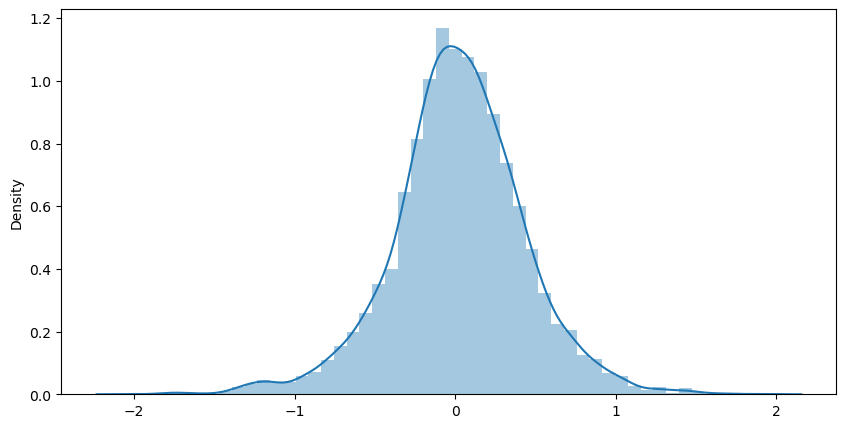

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
residuals = (y_test- result)
sns.distplot(residuals)

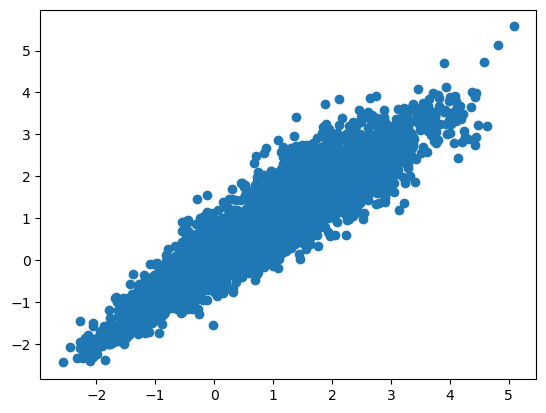

In [23]:
plt.scatter(y_test, result)
plt.plot([0,1],[0,1])

In [24]:
data1 = pd.DataFrame({'origin':y_test * std['y'] + mean['y'],'predict':result* std['y'] + mean['y'],
                     'residual':(y_test * std['y'] + mean['y']) - (result* std['y'] + mean['y'])})
percentage_error = np.mean(np.abs(data1['origin'] - data1['predict'])) / np.mean(data1['origin']) * 100
data1['residual_abs'] = data1['residual'].abs()
data1['y10'] = data1['origin'] / 10 - data1['residual_abs']
data1['y20'] = data1['origin'] / 5 - data1['residual_abs']
data1['y30'] = data1['origin'] / 3.333 - data1['residual_abs']
data1.loc[data1['y10'] >= 0, 'y10'] = 1
data1.loc[data1['y10'] < 0 , 'y10'] = 0
data1.loc[data1['y20'] >= 0, 'y20'] = 1
data1.loc[data1['y20'] < 0 , 'y20'] = 0
data1.loc[data1['y30'] >= 0, 'y30'] = 1
data1.loc[data1['y30'] < 0 , 'y30'] = 0
print(data1)
print(f'預測房價落在實際房價+-10%內的機率為:{data1["y10"].mean()}')
print(f'預測房價落在實際房價+-20%內的機率為:{data1["y20"].mean()}')
print(f'預測房價落在實際房價+-30%內的機率為:{data1["y30"].mean()}')
print("Model Percentage Error: {:.2f}%".format(percentage_error))

        origin        predict      residual  residual_abs  y10  y20  y30
0     111940.0  114866.314395  -2926.314395   2926.314395  1.0  1.0  1.0
1     170784.0  184236.536459 -13452.536459  13452.536459  1.0  1.0  1.0
2      91463.0  110419.042234 -18956.042234  18956.042234  0.0  0.0  1.0
3      30440.0   26320.752686   4119.247314   4119.247314  0.0  1.0  1.0
4      45543.0   53723.629607  -8180.629607   8180.629607  0.0  1.0  1.0
...        ...            ...           ...           ...  ...  ...  ...
8022  115590.0   97751.112130  17838.887870  17838.887870  0.0  1.0  1.0
8023  132443.0  119282.467729  13160.532271  13160.532271  1.0  1.0  1.0
8024  121065.0  107929.031502  13135.968498  13135.968498  0.0  1.0  1.0
8025  179111.0  181685.567608  -2574.567608   2574.567608  1.0  1.0  1.0
8026  158356.0  152376.103720   5979.896280   5979.896280  1.0  1.0  1.0

[8027 rows x 7 columns]
預測房價落在實際房價+-10%內的機率為:0.6146754702877787
預測房價落在實際房價+-20%內的機率為:0.8906191603338732
預測房價落在實際房價+-30%內的機率

In [25]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
print(f"mean_absolute_error: {mean_absolute_error(y_test, result)}")
print(f"mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, result)}")
print(f"mean_squared_error: {mean_squared_error(y_test, result)}")
print(f"explained_variance_score: {explained_variance_score(y_test, result)}")
print(f"r2_score: {r2_score(y_test, result)}")
#print(f"r2_adj_score: {1 - (1 - r2_score(y_test, result)) * (feature_count - 1) / (df.shape[0] - feature_count - 1)}")

mean_absolute_error: 0.3113072518928279
mean_absolute_percentage_error: 2.46646568698977
mean_squared_error: 0.17066676478170317
explained_variance_score: 0.869288674136772
r2_score: 0.8689420961877236
